In [1]:
# We'll be using Sklearn library for this task..
from sklearn.linear_model import LinearRegression 
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


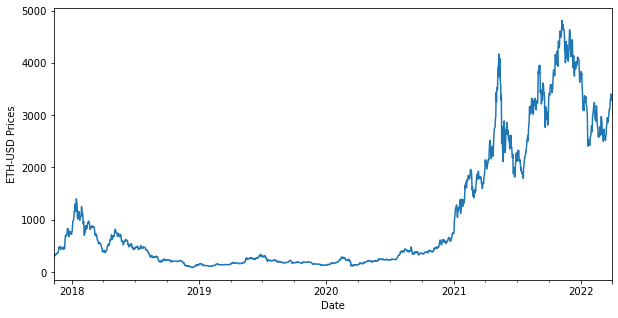

In [2]:
# Read data 
Df = yf.download('ETH-USD','2016-01-01','2022-03-31')
# Only keep close columns 
Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("ETH-USD Prices")
plt.show()

In [3]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 

In [ ]:
Df.head(6)

In [4]:
 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2017-11-18,332.225006,321.527557
2017-11-19,336.976674,324.497335
2017-11-20,344.797333,330.623223
2017-11-21,356.242666,336.406447
2017-11-22,360.505666,342.239003


In [5]:
y = Df['Close']
y.head()

Date
2017-11-18    347.612000
2017-11-19    354.385986
2017-11-20    366.730011
2017-11-21    360.401001
2017-11-22    380.652008
Name: Close, dtype: float64

In [6]:
t=.8 
t = int(t*len(Df)) 


In [7]:
t=.8 
t = int(t*len(Df))

In [8]:
len(Df)

1595

In [ ]:
X[:t]

In [9]:
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [17]:
y_test

Date
2021-05-17    3282.397705
2021-05-18    3380.070068
2021-05-19    2460.679199
2021-05-20    2784.294189
2021-05-21    2430.621338
                 ...     
2022-03-27    3291.577637
2022-03-28    3336.634521
2022-03-29    3401.987793
2022-03-30    3385.157959
2022-03-31    3281.642822
Name: Close, Length: 319, dtype: float64

In [10]:
linear = LinearRegression().fit(X_train,y_train)

In [11]:
predicted_price = linear.predict(X_test) 


In [15]:
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

In [14]:
predicted_price

array([3761.18245463, 3433.45784233, 3339.21609448, 2896.70885032,
       2725.93481749, 2356.45489708, 2332.80447068, 2104.70613718,
       2232.05663563, 2442.22589167, 2796.99360703, 2859.72821583,
       2735.52912365, 2485.97107565, 2335.71037328, 2450.59030012,
       2587.71338106, 2723.91275211, 2780.23159594, 2811.04914222,
       2781.58353483, 2710.13359422, 2656.59286129, 2602.67982215,
       2559.53968687, 2513.07329786, 2453.44740566, 2366.69549221,
       2389.00537138, 2472.83239322, 2580.85091532, 2526.83043275,
       2459.14566675, 2305.93581164, 2233.11007865, 2181.75453488,
       2047.95998445, 1936.68857513, 1843.04928865, 1908.17624341,
       1900.12408818, 1848.40923902, 1852.88031127, 1972.97654601,
       2121.13056205, 2237.41439336, 2244.11123458, 2233.92171352,
       2204.56652582, 2278.31467983, 2286.92844194, 2318.26102611,
       2307.32074065, 2274.30549951, 2200.71924067, 2111.54070256,
       2120.49843616, 2078.81329066, 2016.83949725, 1960.17323

In [ ]:
print(predicted_price)

In [16]:
predicted_price

,price
Date,
2021-05-17,3761.182455
2021-05-18,3433.457842
2021-05-19,3339.216094
2021-05-20,2896.708850
2021-05-21,2725.934817
...,...
2022-03-27,3173.713893
2022-03-28,3242.242621
2022-03-29,3329.605298


<AxesSubplot:xlabel='Date'>

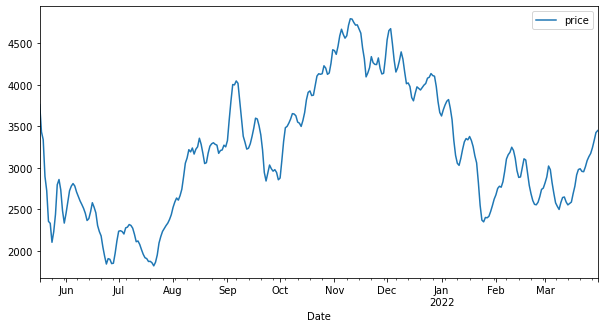

In [18]:
predicted_price.plot(figsize=(10,5)) 

<AxesSubplot:xlabel='Date'>

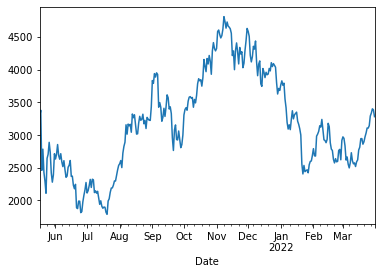

In [19]:
y_test.plot() 

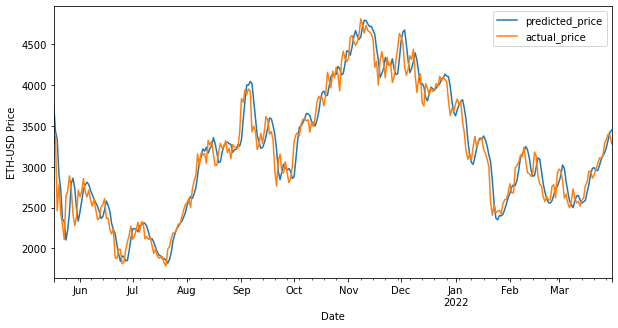

In [20]:
predicted_price.plot(figsize=(10,5)) 
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("ETH-USD Price")  
plt.show()

In [21]:
r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))

93.91